<a href="https://colab.research.google.com/github/FadyKamil15/optimization-algorithms-comparison/blob/main/nadam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import time

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# Split training into 40,000 training and 10,000 validation
x_train, x_val = x_train[:40000], x_train[40000:]
y_train, y_val = y_train[:40000], y_train[40000:]

# Shuffle the training data
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy', #labels are integers
              metrics=['accuracy'])

In [17]:
start_time = time.time()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

end_time = time.time()

# Calculate the total training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2895 - loss: 2.0037 - val_accuracy: 0.3702 - val_loss: 1.7711
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3883 - loss: 1.7286 - val_accuracy: 0.3955 - val_loss: 1.7005
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4099 - loss: 1.6609 - val_accuracy: 0.4075 - val_loss: 1.6799
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4340 - loss: 1.6115 - val_accuracy: 0.4171 - val_loss: 1.6431
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4391 - loss: 1.5837 - val_accuracy: 0.4229 - val_loss: 1.6303
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4520 - loss: 1.5426 - val_accuracy: 0.4293 - val_loss: 1.6193
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4607 - loss: 1.5297 - val_accuracy: 0.4437 - val_loss: 1.5733
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4716 - loss: 1.5036 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


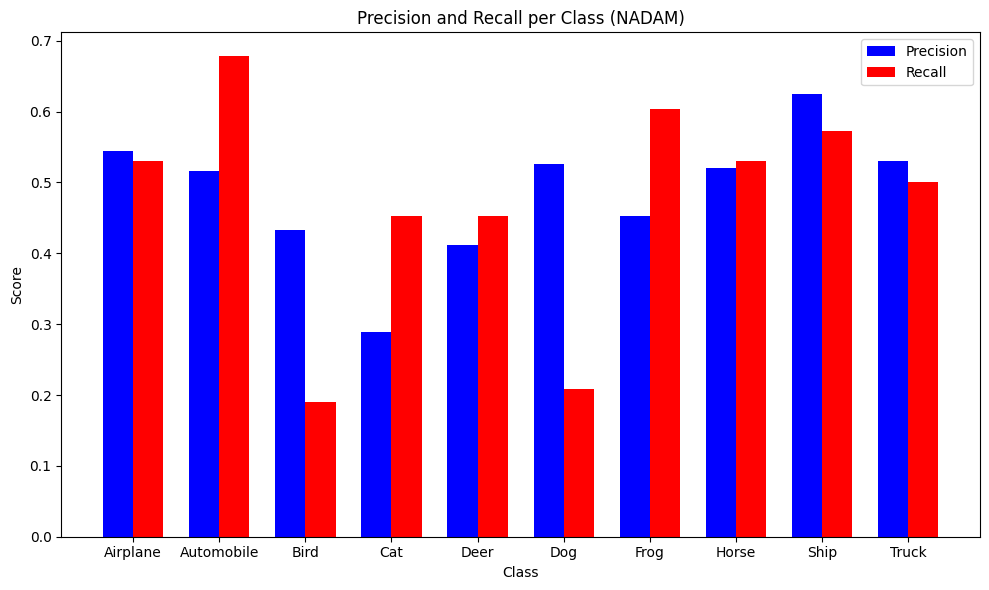

In [6]:
# Evaluate on test data

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Get predictions (class indices)
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=-1)

# Calculate precision for each class using scikit-learn
precision_per_class = precision_score(y_test, predicted_labels, average=None)

# Calculate recall for each class
recall_per_class = recall_score(y_test, predicted_labels, average=None)

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Number of classes
num_classes = len(np.unique(y_test))

# Plotting precision and recall
x = np.arange(num_classes)  # the class labels

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # width of the bars

# Plot precision bars
ax.bar(x - width/2, precision_per_class, width, label='Precision', color='b')

# Plot recall bars
ax.bar(x + width/2, recall_per_class, width, label='Recall', color='r')

# Adding labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision and Recall per Class (NADAM)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

Training time: 46.11805748939514 seconds


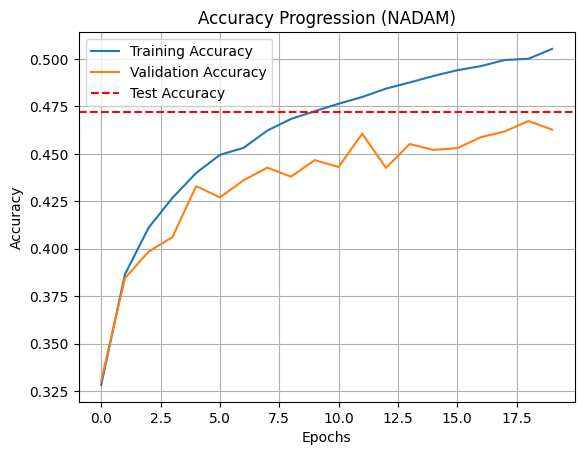

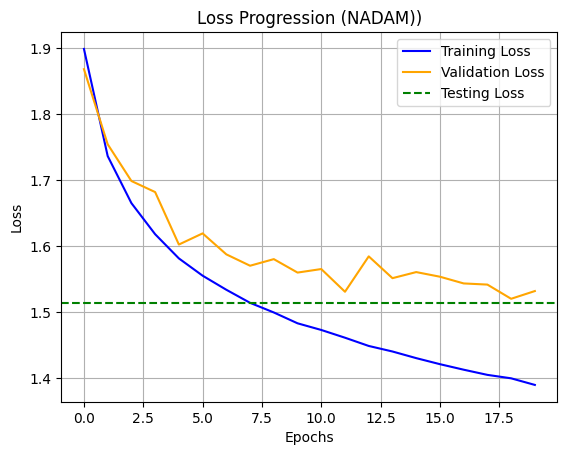

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


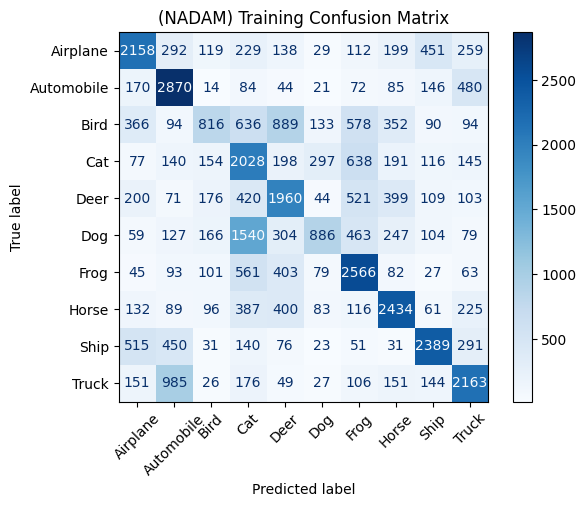

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


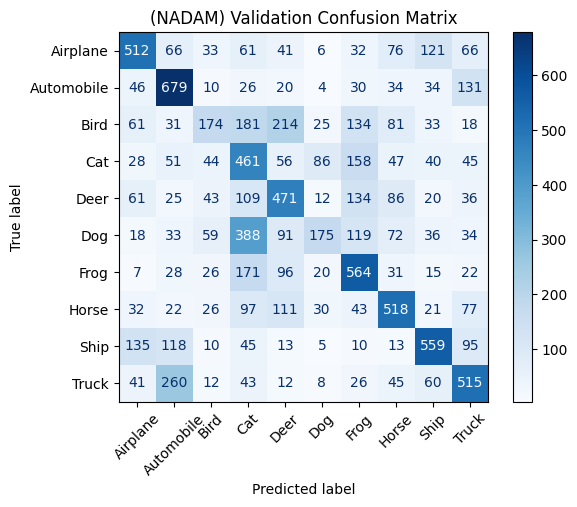

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


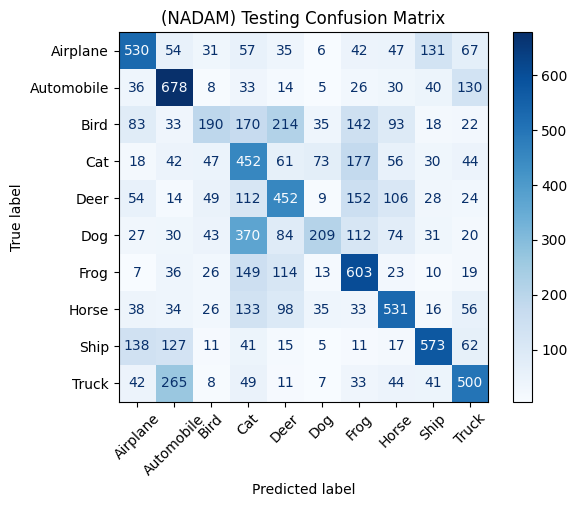

In [7]:
# Visualize training, validation, and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy Progression (NADAM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plotting Training, Testing, and Validation Loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
# Assuming testing loss is stored separately in a variable `test_loss`
plt.axhline(y=test_loss, color='green', linestyle='--', label='Testing Loss')

plt.title('Loss Progression (NADAM))')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Helper function to plot confusion matrices
def plot_confusion_matrix(data, labels, dataset_name):
    predictions = model.predict(data, batch_size=64)
    predicted_classes = np.argmax(predictions, axis=1)
    cm = confusion_matrix(labels, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues , xticks_rotation=45)
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.show()

# Plot confusion matrices for training, validation, and testing
plot_confusion_matrix(x_train, y_train, '(NADAM) Training')
plot_confusion_matrix(x_val, y_val, '(NADAM) Validation')
plot_confusion_matrix(x_test, y_test, '(NADAM) Testing')